# Automotive Industry Stock Market Analysis

This is a 5-year stock market analysis on top 10 major automotive industry companies' stock market (based on Total Marke Capitalization as of June 30, 2023, including US stock market and OTC), from July 1 2018 to June 30 2023 using yfinance, matplotlib, pandas, and numpy.

<img src="company_list.png" width="200"/>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance
import datetime

____
## Part 1: Getting the Data



In [ ]:
startDate = datetime.datetime(2018, 7, 1)
endDate = datetime.datetime(2023, 6, 30)

companies = ["TSLA", "TM", "BYDDF", "MBGYY", "VWAGY", "BMWYY", "STLA", "RACE", "HMC", "F", "GM", "VLVLY", "LI", "HYMTF", "GWLLY", "NIO", "MAHMF", "RIVN", "SZKMY", "NSANY"]
# Local csv files generated using below lines
# for company in companies:
#     yfinance.Ticker(company).history(start=startDate, end=endDate).to_csv("source_data/" + company + ".csv")

# Access online
data = {}
for company in companies:
    data[company] = yfinance.Ticker(company).history(start=startDate, end=endDate)

____

## Part 2: Visualizing the Data

### Open Price of stock each day

Text(0, 0.5, 'Price')

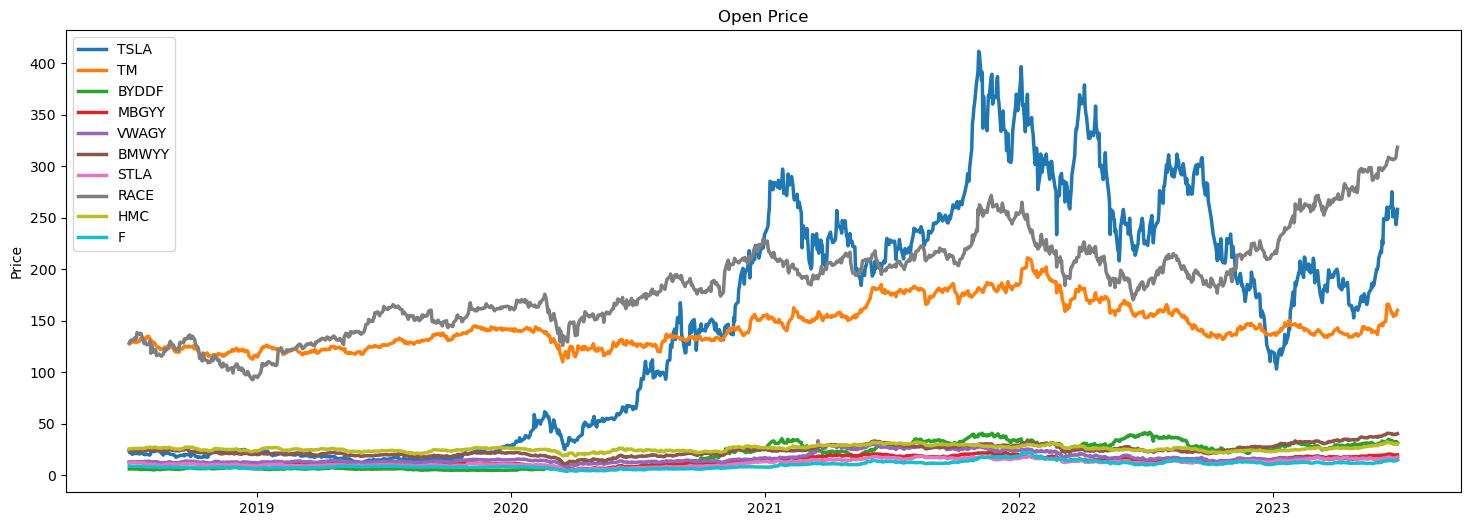

In [22]:
# Modify number below to change number of top companies showing in the plot.
TOP_AMOUNT = 10

plt.figure(figsize=(18, 6))
count = 0
for company in companies:
    if count < TOP_AMOUNT:
        plt.plot(data[company]["Open"], label=company, linewidth=2.5)
        count += 1
plt.legend()
plt.title("Open Price")
plt.ylabel("Price")

### Volume of stock traded each day

Text(0, 0.5, 'Volume')

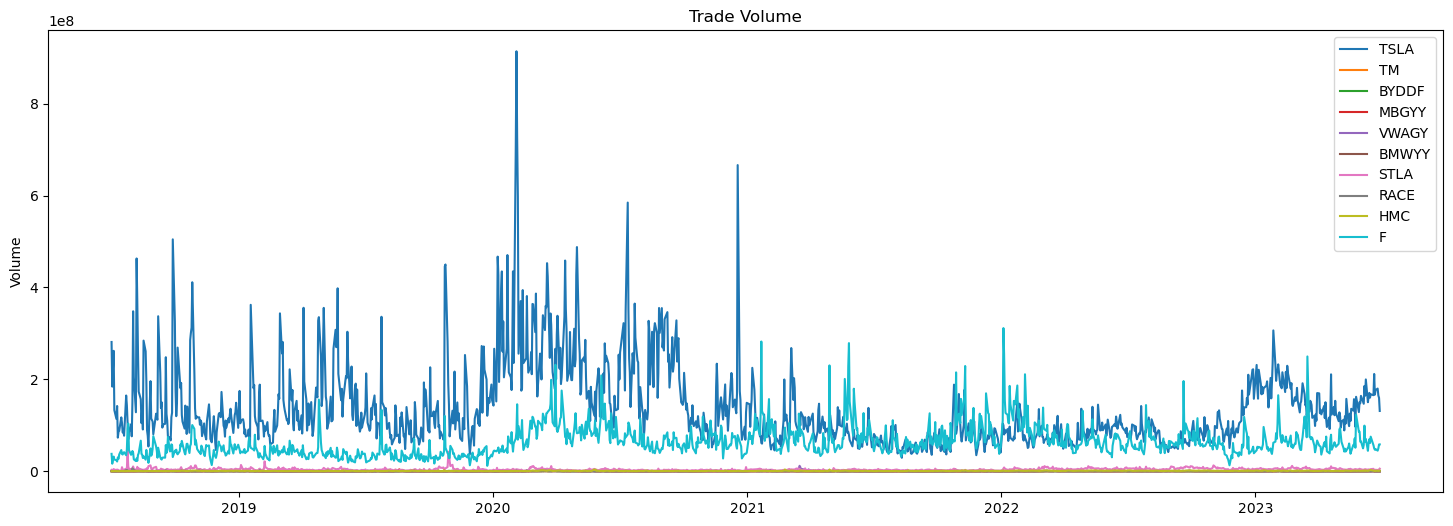

In [23]:
# Modify number below to change number of top companies showing in the plot.
TOP_AMOUNT = 10

plt.figure(figsize=(18, 6))
count = 0
for company in companies:
    if count < TOP_AMOUNT:
        plt.plot(data[company]["Volume"], label=company)
        count += 1
plt.legend()
plt.title("Trade Volume")
plt.ylabel("Volume")

Tesla had a really big spike somewhere in early 2020. Let's figure out what was the date of this maximum trading volume for Tesla and what happened on that day.

In [24]:
data["TSLA"].iloc[data["TSLA"]["Volume"].argmax()].name

Timestamp('2020-02-04 00:00:00-0500', tz='America/New_York')

2020-02-04

https://www.nytimes.com/2020/02/04/business/tesla-stock-price.html

The Open Price Time Series Visualization makes Tesla look like it's mostly been much more valuable as a company than traditional car maker like Ford, Volkswagen... But to really understand this we would need to look at the total market cap of the company, not just the stock price. Here, a simple calcualtion of multplying the Volume column by the Open price was used to to represent total money traded

In [25]:
for company in companies:
    data[company]["Total Traded"] = data[company]["Open"] * data[company]["Volume"]

Then plot this "Total Traded" against the time index

Text(0.5, 1.0, 'Total Trade $')

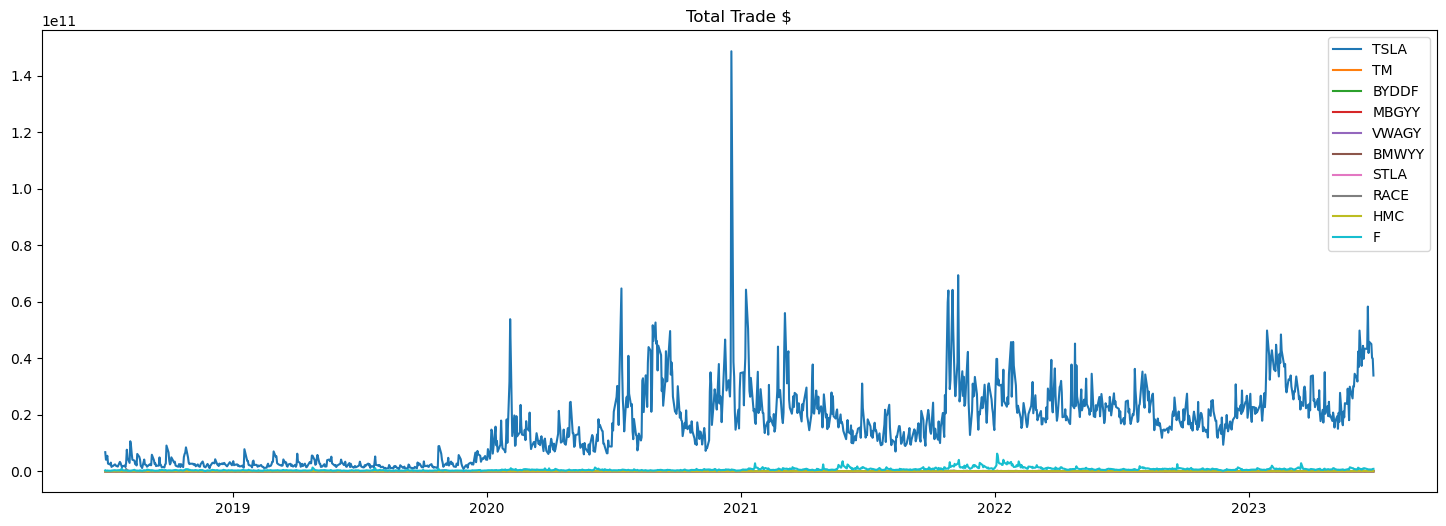

In [26]:
# Modify number below to change number of top companies showing in the plot.
TOP_AMOUNT = 10

plt.figure(figsize=(18, 6))
count = 0
for company in companies:
    if count < TOP_AMOUNT:
        plt.plot(data[company]["Total Traded"], label=company)
        count += 1
plt.legend()
plt.title("Total Trade $")

Interestingly, there was huge amount of money traded for Tesla somewhere in late 2020. Let's find out what date was that and what happened?

In [27]:
data["TSLA"].iloc[data["TSLA"]["Total Traded"].argmax()].name

Timestamp('2020-12-18 00:00:00-0500', tz='America/New_York')

2020-12-18

https://www.cnbc.com/2020/12/18/tesla-jumps-6percent-in-heavy-volume-sees-wild-trading-volume-more-than-130-billion-worth-of-stock-changes-hands-ahead-of-sp-add.html

____

### More graphs with Moving Averages. Below are the MA50 and MA200

Text(0.5, 1.0, 'Moving Average Open Price')

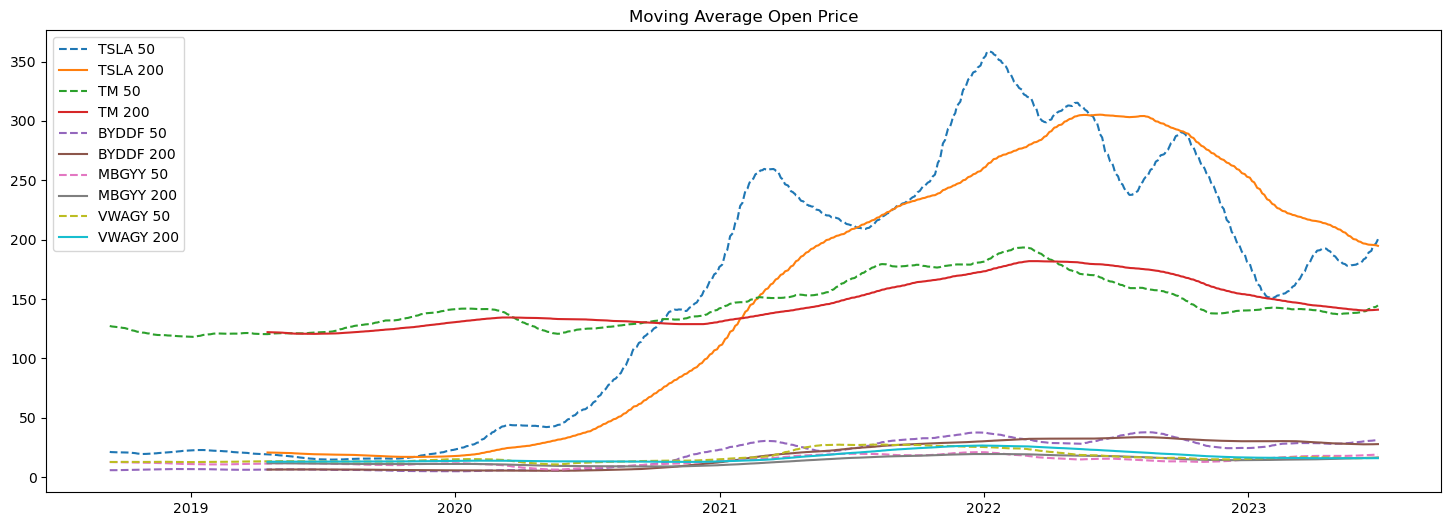

In [28]:
# Modify number below to change number of top companies showing in the plot.
TOP_AMOUNT = 5

plt.figure(figsize=(18, 6))
count = 0
for company in companies:
    if count < TOP_AMOUNT:
        plt.plot(data[company]["Open"].rolling(window=50).mean(), label=company + " 50", ls="--")
        plt.plot(data[company]["Open"].rolling(window=200).mean(), label=company + " 200")
        count += 1

plt.legend()
plt.title("Moving Average Open Price")

______

### Relationship between top 5 companies' stock open price through a scatter matrix plot

array([[<Axes: xlabel='Tesla Open', ylabel='Tesla Open'>,
        <Axes: xlabel='Toyota Open', ylabel='Tesla Open'>,
        <Axes: xlabel='BYD Open', ylabel='Tesla Open'>,
        <Axes: xlabel='Mercedes Benz Open', ylabel='Tesla Open'>,
        <Axes: xlabel='Volkswagen Open', ylabel='Tesla Open'>],
       [<Axes: xlabel='Tesla Open', ylabel='Toyota Open'>,
        <Axes: xlabel='Toyota Open', ylabel='Toyota Open'>,
        <Axes: xlabel='BYD Open', ylabel='Toyota Open'>,
        <Axes: xlabel='Mercedes Benz Open', ylabel='Toyota Open'>,
        <Axes: xlabel='Volkswagen Open', ylabel='Toyota Open'>],
       [<Axes: xlabel='Tesla Open', ylabel='BYD Open'>,
        <Axes: xlabel='Toyota Open', ylabel='BYD Open'>,
        <Axes: xlabel='BYD Open', ylabel='BYD Open'>,
        <Axes: xlabel='Mercedes Benz Open', ylabel='BYD Open'>,
        <Axes: xlabel='Volkswagen Open', ylabel='BYD Open'>],
       [<Axes: xlabel='Tesla Open', ylabel='Mercedes Benz Open'>,
        <Axes: xlabel='Toyota 

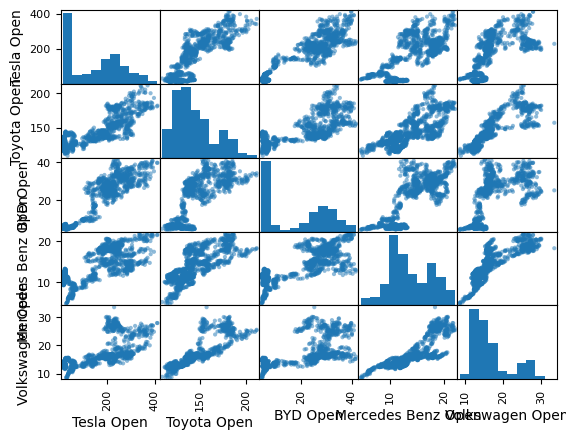

In [29]:
from pandas.plotting import scatter_matrix
open_prices = pd.concat([data['TSLA']['Open'],data['TM']['Open'],data['BYDDF']['Open'], data['MBGYY']['Open'], data['VWAGY']['Open']],axis=1)
open_prices.columns = ['Tesla Open','Toyota Open','BYD Open','Mercedes Benz Open', 'Volkswagen Open']
scatter_matrix(open_prices)

____
# Part 3: Financial Analysis

## Daily Percentage Change
Daily percentage change is defined by the following formula:

$ r_t = \frac{p_t}{p_{t-1}} -1$

This defines r_t (return at time t) as equal to the price at time t divided by the price at time t-1 (the previous day) minus 1. Basically this just informs you of your percent gain (or loss) if you bought the stock on day and then sold it the next day. While this isn't necessarily helpful for attempting to predict future values of the stock, its very helpful in analyzing the volatility of the stock. If daily returns have a wide distribution, the stock is more volatile from one day to the next. Here, I calculate the percent returns and then plot them with a histogram in order to decide which stock is the most stable.

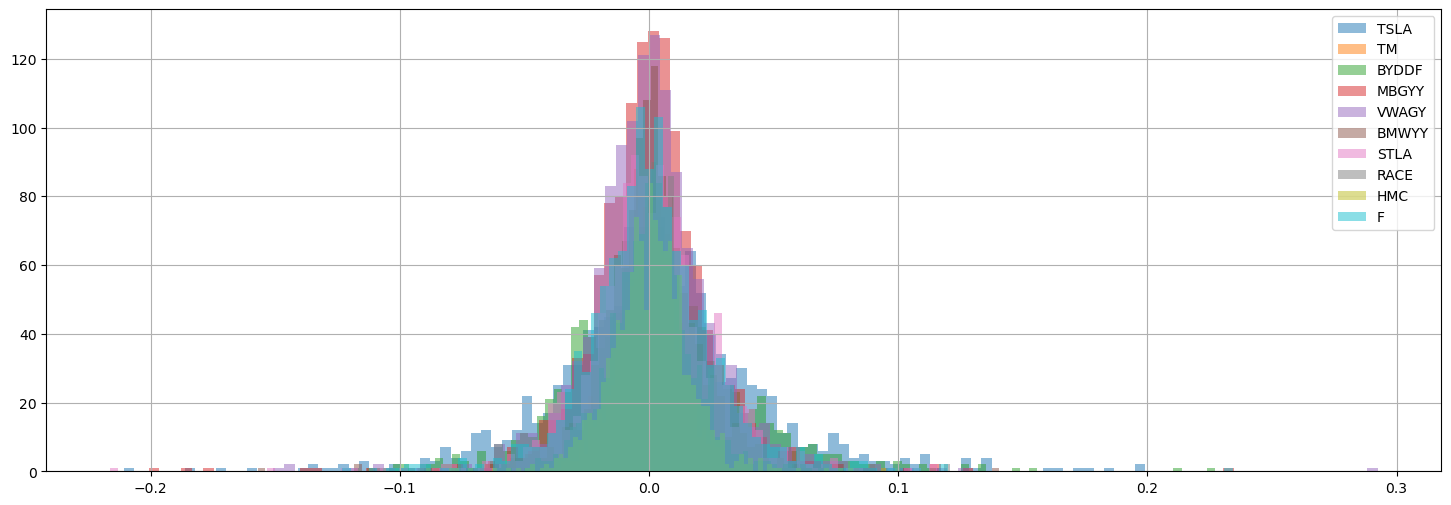

In [37]:
# Modify number below to change number of top companies showing in the plot.
TOP_AMOUNT = 10

plt.figure(figsize=(18, 6))
count = 0
for company in companies:
    if count < TOP_AMOUNT:
        data[company]["Returns"] = data[company]["Close"].pct_change(1)
        data[company]['Returns'].hist(bins=100, alpha=0.5, label=company)
        count += 1
plt.legend()

### KDE instead of histograms for another view point.

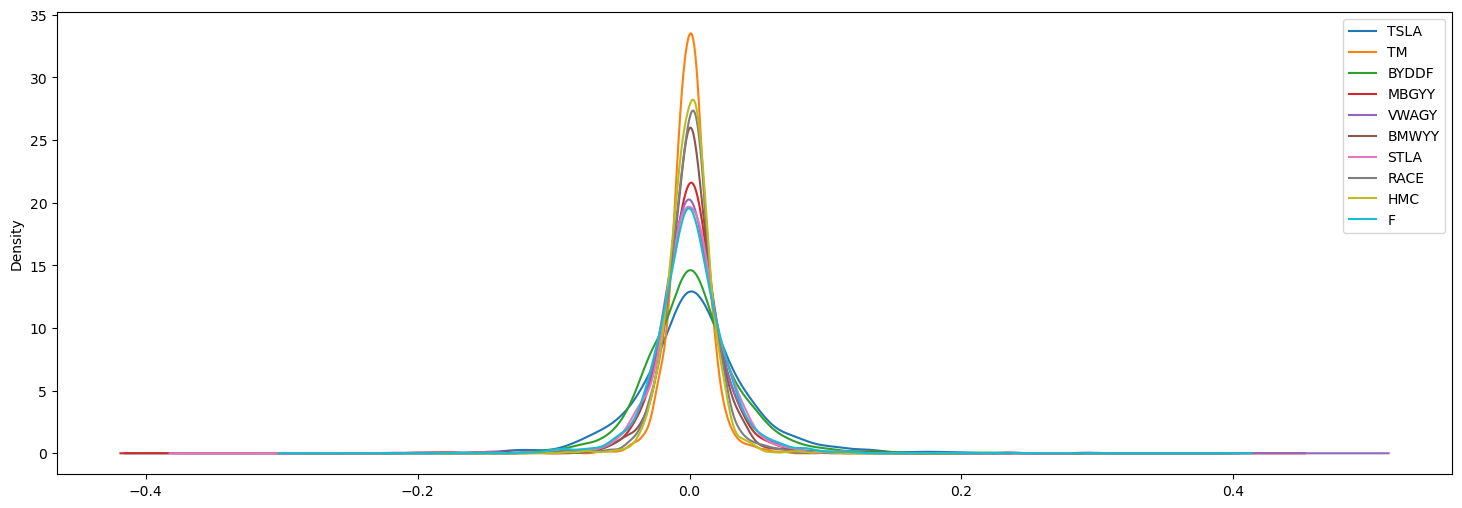

In [31]:
# Modify number below to change number of top companies showing in the plot.
TOP_AMOUNT = 10

plt.figure(figsize=(18, 6))
count = 0
for company in companies:
    if count < TOP_AMOUNT:
        data[company]["Returns"] = data[company]["Close"].pct_change(1)
        data[company]['Returns'].plot(kind="kde", label=company)
        count += 1
plt.legend()

### Box plots comparing the returns.

<Axes: >

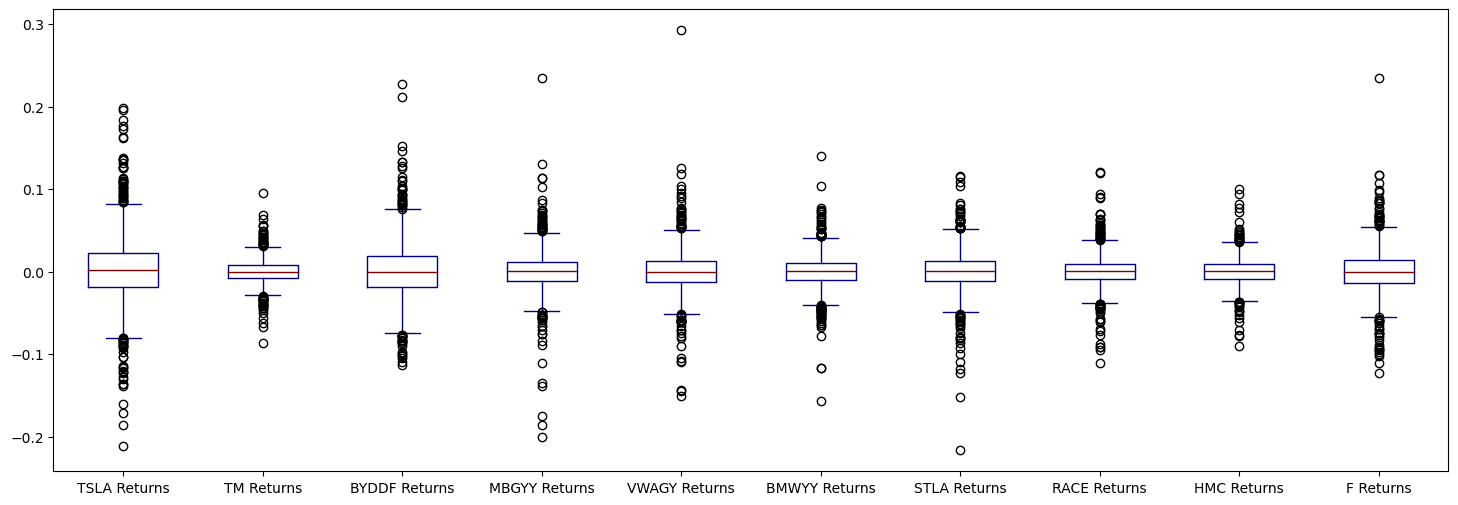

In [38]:
# Modify number below to change number of top companies showing in the plot.
TOP_AMOUNT = 10

count = 0
for company in companies:
    if count < TOP_AMOUNT:
        data[company]["Returns"] = data[company]["Close"].pct_change(1)
        count += 1
returns = pd.concat([data[company]["Returns"] for company in companies[:TOP_AMOUNT]], axis=1)
returns.columns = [(company + " Returns") for company in companies[:TOP_AMOUNT]]
returns.plot(kind='box', figsize=(18, 6), colormap='jet')

## Comparing Daily Returns between Stocks

Here, I created a scatter matrix plot to see the correlation between each of the above stocks' daily returns. This helps answer the questions of how related different car companies are. Is Tesla begin treated more as a technology company rather than a traditional car company (such as Toyota, Mercedes, VW) by the market?

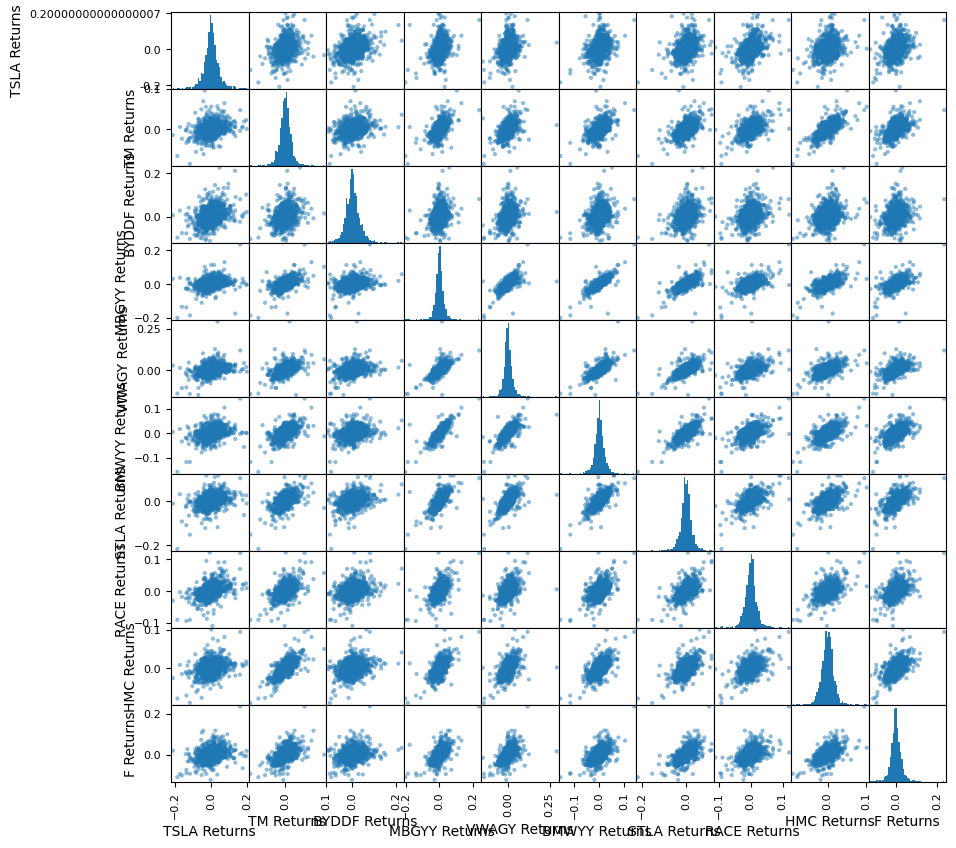

In [41]:
scatter_matrix(returns,figsize=(10,10),alpha=0.5,hist_kwds={'bins':50});


It looks like Mercedes Benz and Volkswagen do have some sort of possible linear relationship, let's plot just these two against each other in scatter plot to view this more closely.

Text(0.5, 0, 'MBGYY Returns')

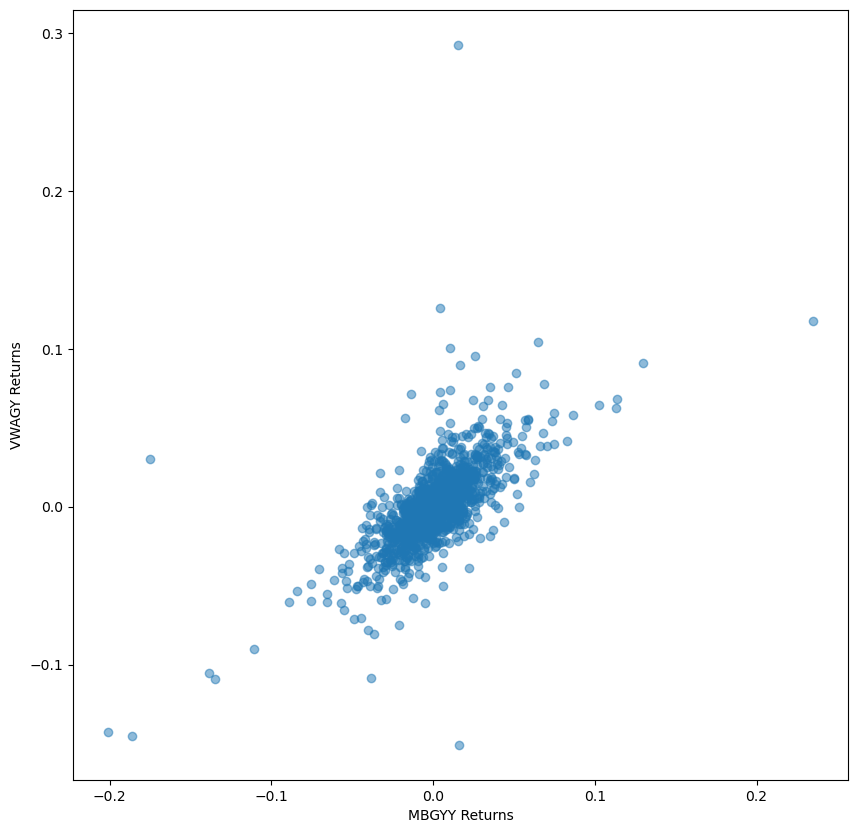

In [34]:
plt.figure(figsize=(10,10))
plt.scatter(x=data["MBGYY"]["Returns"], y=data["VWAGY"]["Returns"], alpha=0.5)
plt.ylabel("VWAGY Returns")
plt.xlabel("MBGYY Returns")

____
## Cumulative Daily Returns

With daily cumulative returns, the question we are trying to answer is that if we invested $1 in the company at the beginning of the time series, how much would it be worth today? This is different than just the stock price at the current day, because it will take into account the daily returns. In my calculation here, dividend is not taken into consideration.

For example:

    Date                        Price
    01/01/2018                   10
    01/02/2018                   15
    01/03/2018                   20
    01/04/2018                   25

    Date                       Cumulative Return         %Cumulative Return
    01/01/2018                  10/10 =  1                         100 %   
    01/02/2018                  15/10 =  3/2                       150 %
    01/03/2018                  20/10 =  2                         200 %
    01/04/2018                  25/10 =  5/2                       250 %

The formula for a cumulative daily return is:

$ i_i = (1+r_t) * i_{t-1} $

Here we can see we are just multiplying our previous investment at i at t-1 by 1+our percent returns. Pandas makes this very simple to calculate with its cumprod() method.

First create the cumulative daily return column for each car company

In [42]:
for company in companies:
    data[company]["Cumulative Returns"] = (1 + data[company]["Returns"]).cumprod()

Plot the Cumulative Return columns against the time series index in order to find out which stock showed the highest return for a $1 invested and which showed the lowest.

Text(0.5, 0, 'Year')

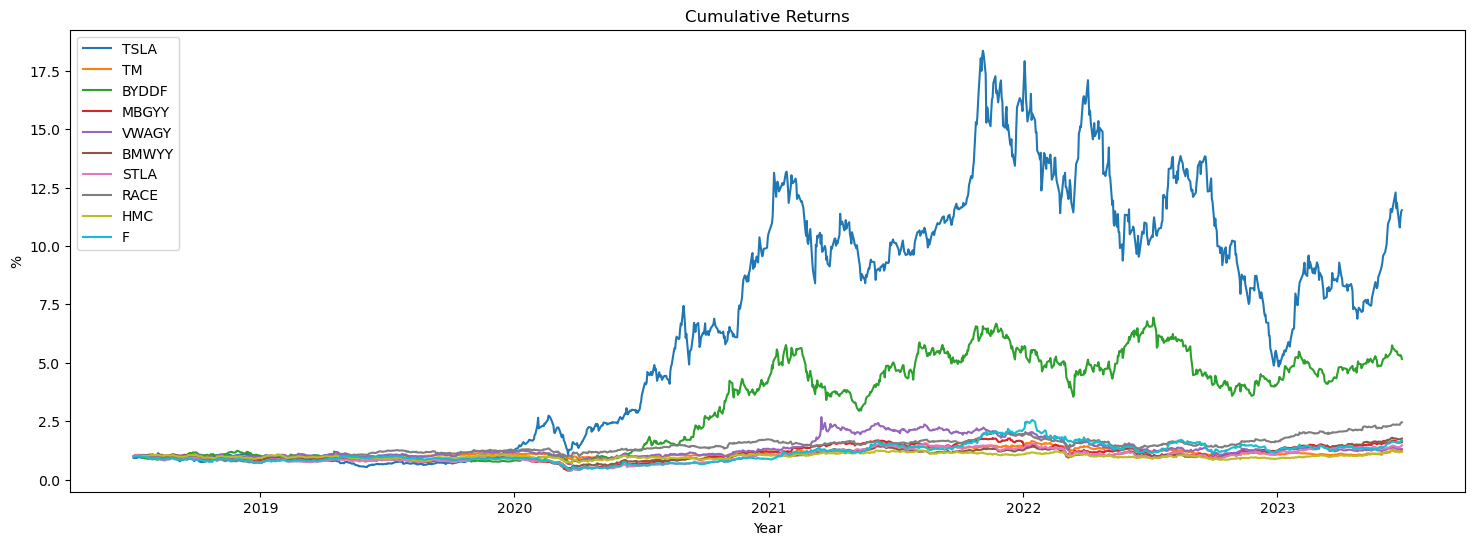

In [44]:
# Modify number below to change number of top companies showing in the plot.
TOP_AMOUNT = 10

plt.figure(figsize=(18, 6))
count = 0
for company in companies:
    if count < TOP_AMOUNT:
        plt.plot(data[company]["Cumulative Returns"], label=company)
        count += 1
plt.legend()
plt.title("Cumulative Returns")
plt.ylabel("%")
plt.xlabel("Year")